In [1]:
library(dada2)
library(dplyr)

Loading required package: Rcpp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
path = "~/scratch/reads/inverts/Invertebrates/trimmed"

In [3]:
fnFs <- sort(list.files(path, pattern="_R1.fq.gz", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2.fq.gz", full.names = TRUE))
# Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

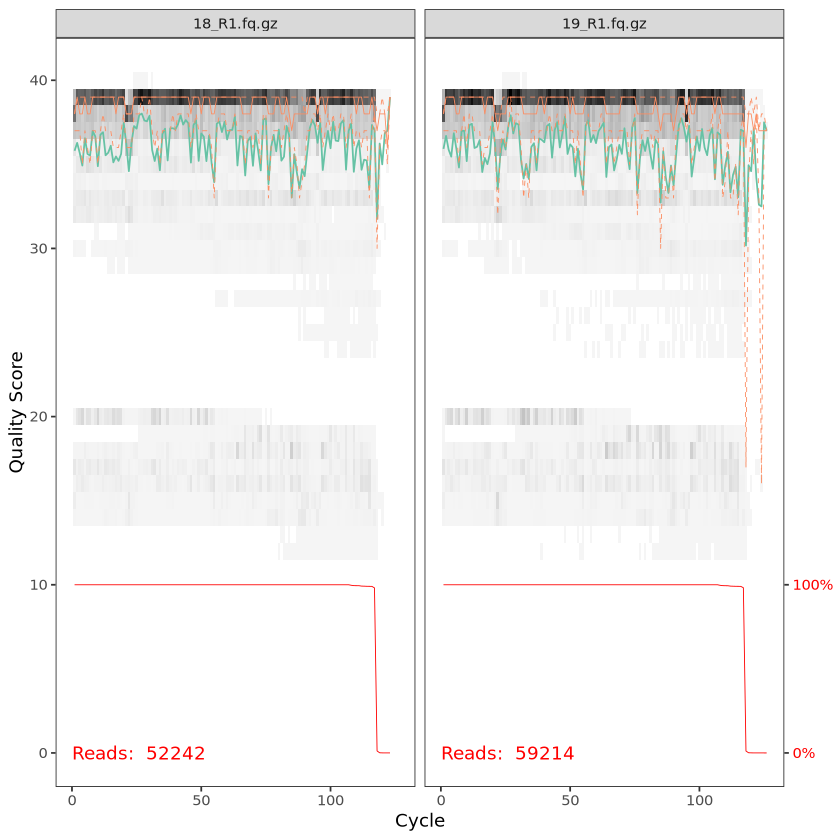

In [4]:
plotQualityProfile(fnFs[1:2])

In [ ]:
plotQualityProfile(fnRs[1:2])

In [9]:
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))
names(filtFs) <- sample.names
names(filtRs) <- sample.names

No need to truncate this data - All positions in all reads look excellent.

In [10]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs,,
              maxN=0, maxEE=c(2,2), rm.phix=TRUE,
              compress=TRUE, multithread=8)
head(out)

Creating output directory: /storage/home/nsl5160/scratch/reads/inverts/Invertebrates/trimmed/filtered



,reads.in,reads.out
18_R1.fq.gz,51961,50354
19_R1.fq.gz,58879,56139
20_R1.fq.gz,100876,96656
21_R1.fq.gz,31384,30427
22_R1.fq.gz,53556,51561
23_R1.fq.gz,126706,122519


In [11]:
filtFs <- filtFs[file.exists(filtFs)]
filtRs <- filtRs[file.exists(filtRs)]

In [12]:
errF <- learnErrors(filtFs, multithread=8)
errR <- learnErrors(filtRs, multithread=8)

149519134 total bases in 1277893 reads from 12 samples will be used for learning the error rates.
161011304 total bases in 1277893 reads from 12 samples will be used for learning the error rates.


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


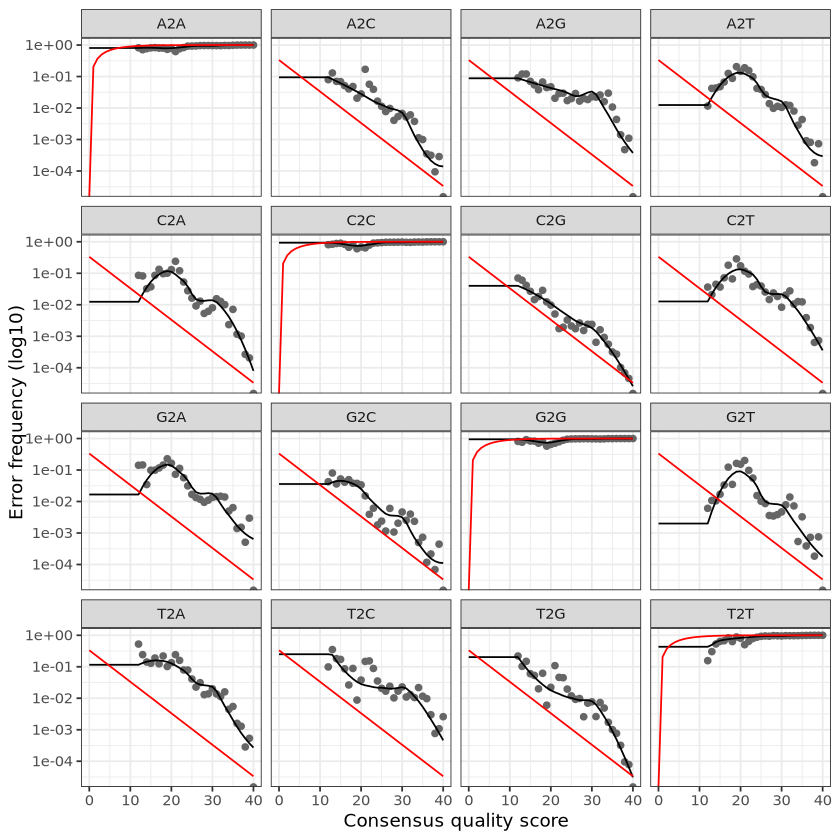

In [13]:
plotErrors(errF, nominalQ=TRUE)

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


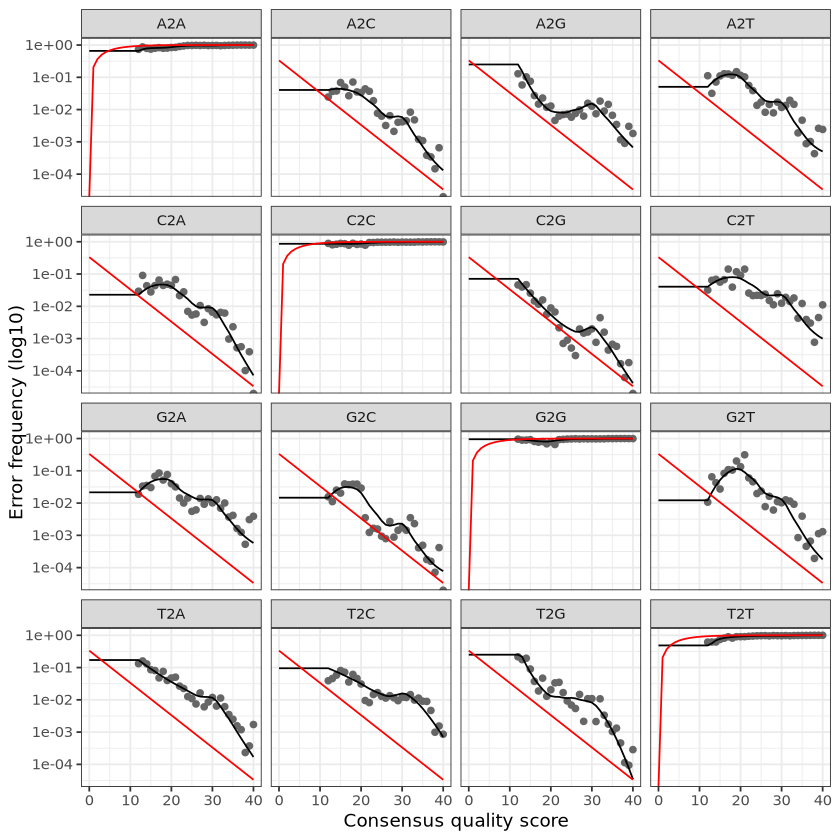

In [14]:
plotErrors(errR, nominalQ=TRUE)

In [15]:
dadaFs <- dada(filtFs, err=errF, multithread=8)

Sample 1 - 50354 reads in 14832 unique sequences.
Sample 2 - 56139 reads in 19140 unique sequences.
Sample 3 - 96656 reads in 21002 unique sequences.
Sample 4 - 30427 reads in 12822 unique sequences.
Sample 5 - 51561 reads in 14574 unique sequences.
Sample 6 - 122519 reads in 38399 unique sequences.
Sample 7 - 23184 reads in 7272 unique sequences.
Sample 8 - 43974 reads in 10943 unique sequences.
Sample 9 - 59851 reads in 17076 unique sequences.
Sample 10 - 575 reads in 566 unique sequences.
Sample 11 - 210247 reads in 42301 unique sequences.
Sample 12 - 532406 reads in 111879 unique sequences.
Sample 13 - 1475 reads in 676 unique sequences.
Sample 14 - 909 reads in 501 unique sequences.
Sample 15 - 156228 reads in 35664 unique sequences.
Sample 16 - 40698 reads in 7929 unique sequences.
Sample 17 - 38869 reads in 8673 unique sequences.
Sample 18 - 111201 reads in 22312 unique sequences.
Sample 19 - 18558 reads in 6103 unique sequences.
Sample 20 - 38866 reads in 14128 unique sequences

In [16]:
dadaRs <- dada(filtRs, err=errR, multithread=8)

Sample 1 - 50354 reads in 13219 unique sequences.
Sample 2 - 56139 reads in 18411 unique sequences.
Sample 3 - 96656 reads in 30307 unique sequences.
Sample 4 - 30427 reads in 9962 unique sequences.
Sample 5 - 51561 reads in 13480 unique sequences.
Sample 6 - 122519 reads in 26151 unique sequences.
Sample 7 - 23184 reads in 8499 unique sequences.
Sample 8 - 43974 reads in 14776 unique sequences.
Sample 9 - 59851 reads in 18253 unique sequences.
Sample 10 - 575 reads in 566 unique sequences.
Sample 11 - 210247 reads in 56386 unique sequences.
Sample 12 - 532406 reads in 146849 unique sequences.
Sample 13 - 1475 reads in 768 unique sequences.
Sample 14 - 909 reads in 555 unique sequences.
Sample 15 - 156228 reads in 49210 unique sequences.
Sample 16 - 40698 reads in 12466 unique sequences.
Sample 17 - 38869 reads in 11258 unique sequences.
Sample 18 - 111201 reads in 31702 unique sequences.
Sample 19 - 18558 reads in 6536 unique sequences.
Sample 20 - 38866 reads in 12887 unique sequence

In [17]:
mergers <- mergePairs(dadaFs, filtFs, dadaRs, filtRs, verbose=TRUE)
head(mergers[[1]])

48612 paired-reads (in 19 unique pairings) successfully merged out of 49524 (in 130 pairings) input.

51995 paired-reads (in 70 unique pairings) successfully merged out of 54757 (in 704 pairings) input.

92329 paired-reads (in 71 unique pairings) successfully merged out of 94812 (in 542 pairings) input.

28304 paired-reads (in 59 unique pairings) successfully merged out of 29638 (in 509 pairings) input.

49515 paired-reads (in 39 unique pairings) successfully merged out of 50510 (in 260 pairings) input.

116631 paired-reads (in 32 unique pairings) successfully merged out of 120020 (in 232 pairings) input.

21385 paired-reads (in 24 unique pairings) successfully merged out of 22147 (in 177 pairings) input.

42299 paired-reads (in 53 unique pairings) successfully merged out of 43123 (in 296 pairings) input.

56868 paired-reads (in 68 unique pairings) successfully merged out of 58826 (in 509 pairings) input.

7 paired-reads (in 1 unique pairings) successfully merged out of 299 (in 10 pair

,sequence,abundance,forward,reverse,nmatch,nmismatch,nindel,prefer,accept
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
1,TAAAGTAATTCCATTTGCTCGTATATTAATTGCTGTTGTAATAAAGTTCACAGACCCTAAAATTGATGAAATTCCTGCTAAATGGAGGGAAAAAATAGCTAAATCAACAGAAGCTCCGCTATGAGCAATATTTGCAGAAAGAG,19065,1,1,100,0,0,2,TRUE
2,TAAAGTAATACCGTTTGATCGTATATTAATTACAGTTGTAATAAAATTTACAGCACCTAAAATAGAAGAAATACCAGCTAAATGAAGAGAAAAAATAGCTAAATCTACTGAAGCACCTGCATGAGCAATACCAGATGCTAAT,6347,2,2,101,0,0,2,TRUE
3,TAAGGTAATTCCATTTGCTCGTATATTAATTACAGTTGTAATAAAATTTACAGAACCTAAAATAGAGGATACACCAGCAAGATGTAAAGAGAAAATTGCCAAATCTACTGAAGCCCCTCTATGGGCAATAGCTGCAGAAAGAG,4829,4,4,100,0,0,2,TRUE
4,TAATGTAATTCCATTAGCACGTATATTAATAGCAGTAGTAATAAAATTTACTGATCCTAAAATAGAAGAAATTCCTGCTAAATGAAGAGAAAAAATAGCTAAATCTACTGAAGCCCCTCTATGAGCAATATTAGAAGATAAA,4555,3,3,101,0,0,2,TRUE
5,TAAAGTAATTCCATTAGATCGTATATTAATTACTGTTGTAATAAAATTTACAGCACCTAAAATAGATGATACTCCAGCTAAATGAAGAGAAAAAATAGCTAAATCTACAGAAGCTCCAGCATGAGCAATACCAGATGCCAAGG,3807,5,6,100,0,0,2,TRUE
6,TTTAGTAAGGGAAGATACTCGCATATTAATAATAGTTGTAATAAAATTTATTGCACCTAAAATCGAGGAAATTCCCGCTAAATGCAAACTAAAAATTGCTAAATCAACTGCTGAACCAGCATGCGCTAAAATACCAGATAAT,2894,6,5,101,0,0,2,TRUE


In [18]:
seqtab <- makeSequenceTable(mergers)
dim(seqtab)

[1]  36 731

In [19]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", 
                                    multithread=8, verbose=TRUE)
dim(seqtab.nochim)

Identified 53 bimeras out of 731 input sequences.



[1]  36 678

In [20]:
sum(seqtab.nochim)/sum(seqtab)

[1] 0.9907813

In [21]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
# If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")
rownames(track) <- sample.names
head(track)

,input,filtered,denoisedF,denoisedR,merged,nonchim
18,51961,50354,50000,49791,48612,48612
19,58879,56139,55810,54975,51995,50990
20,100876,96656,96380,95019,92329,89680
21,31384,30427,30042,29971,28304,28249
22,53556,51561,51045,50935,49515,49428
23,126706,122519,120776,121304,116631,114612


In [22]:
save.image(file='../dada2_insects.RData')

In [23]:
write.csv(track, "../data_insects_tracking_dada2.csv")

In [4]:
tableexport = t(seqtab.nochim)

In [5]:
tableexport = as.data.frame(tableexport)

In [6]:
tableexport$CountsAcross = rowSums(tableexport)

In [7]:
tableexport <- cbind(ASV = rownames(tableexport), tableexport)
rownames(tableexport) <- 1:nrow(tableexport)

In [8]:
write.csv(tableexport, "../dada2_asv_table_insects.csv")